In [1]:
'''
Given a csv file with the following format:

OBJECTID,Crop2014,Acres,County,Comments,Source,Modified_B,Date_Data_,Last_Modif,DWR_Standa,GlobalID,Shape_Leng,Shape_Area,_count,_sum,_mean,_median,_stdev,_min,_max,_range,_minority,_majority,_variety,_variance

draw a histogram for every crop, x coordinate is the average eta with range between 1 and 8
y coordinate is the number of fields with eta value fall betweem 1 and 2, 2 and 3, etc for a specific crop. 
'''

'\nGiven a csv file with the following format:\n\nOBJECTID,Crop2014,Acres,County,Comments,Source,Modified_B,Date_Data_,Last_Modif,DWR_Standa,GlobalID,Shape_Leng,Shape_Area,_count,_sum,_mean,_median,_stdev,_min,_max,_range,_minority,_majority,_variety,_variance\n\ndraw a histogram for every crop, x coordinate is the average eta with range between 1 and 8\ny coordinate is the number of fields with eta value fall betweem 1 and 2, 2 and 3, etc for a specific crop. \n'

In [13]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [3]:
'''
create a dictionary with key representing crop name and value being a list of average eta values for that crop
from the given csv
'''
def create_crop_eta_dict(filename):
    crops = {}
    with open(filename, mode='r') as f:
        #skip the header row
        next(f, None)
        reader = csv.reader(f)
        
        for r in reader:
            crop = r[1]
            avg_eta = float(r[15])
            
            if crop not in crops:
                crops[crop] = []
            crops[crop].append(avg_eta)
    return crops


In [5]:
crops_dict = create_crop_eta_dict("../data/CropCensus_withEta.csv")

In [6]:
'''
function that draws a histogram given a list of eta values and crop name.
It also has an option to save the figure to a file
'''
def draw_hist_by_crop(eta_arr, crop, save_to_file = False):
    plt.title('average eta for ' + crop)
    plt.xlabel('average eta')
    plt.ylabel('number of fields')
    plt.hist(x=np.array(eta_arr, dtype=np.float64), bins=8)
    if save_to_file:
        plt.savefig('../plots/' + crop + '_eta.png')
    plt.show()

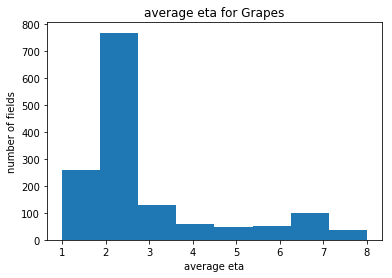

In [7]:
draw_hist_by_crop(crops_dict["Grapes"], "Grapes", save_to_file = True)

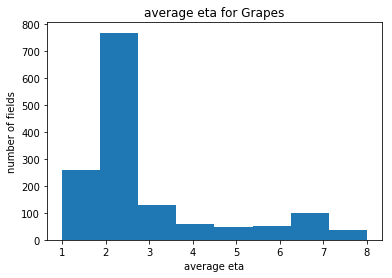

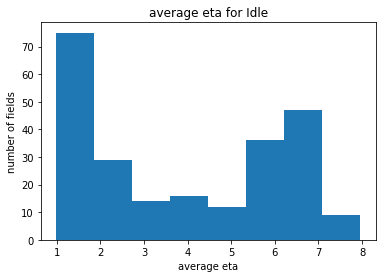

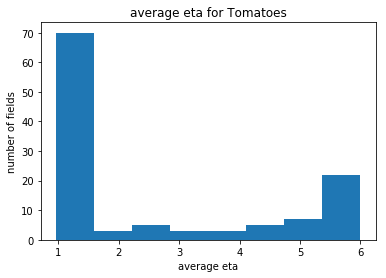

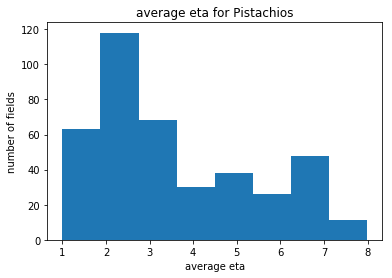

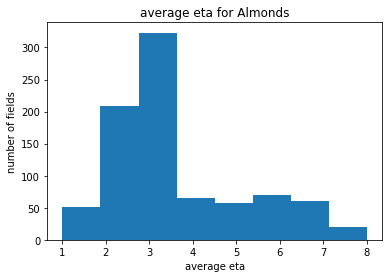

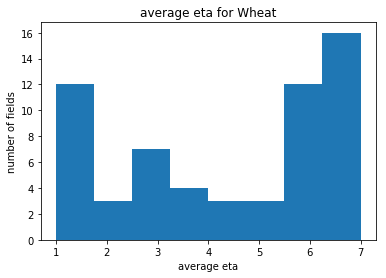

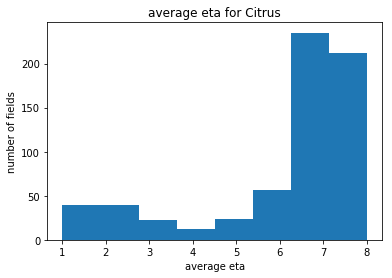

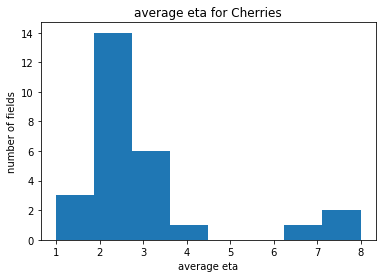

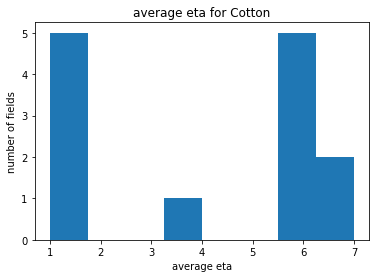

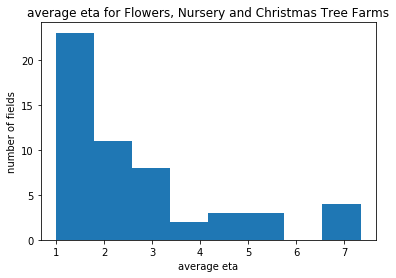

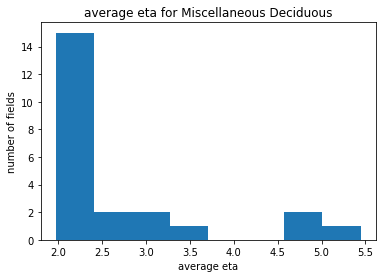

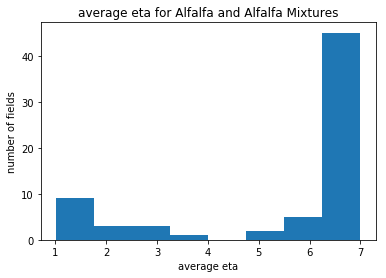

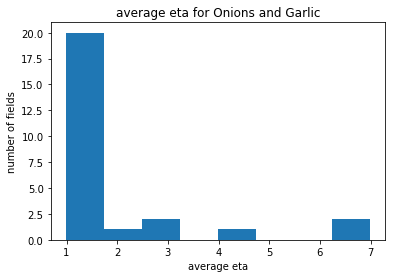

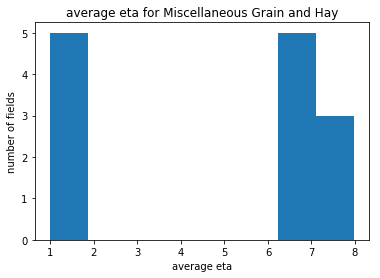

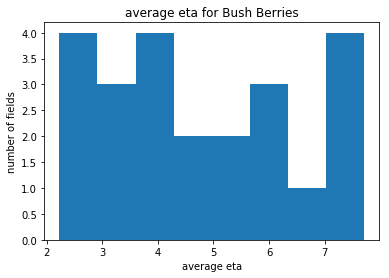

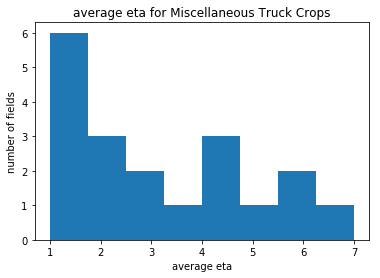

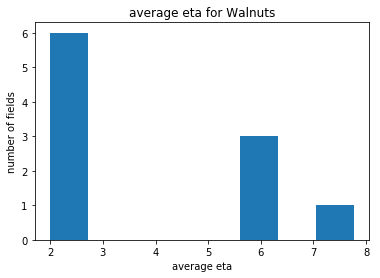

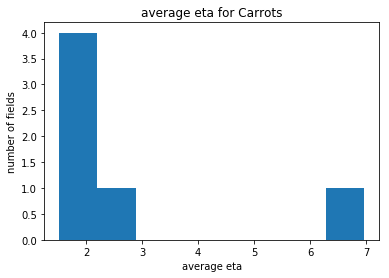

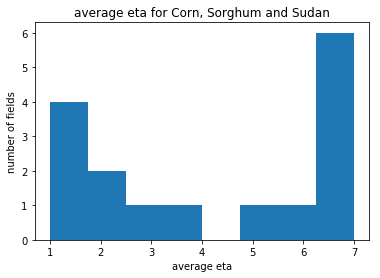

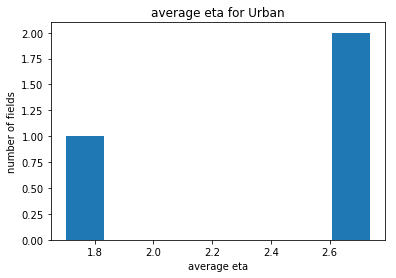

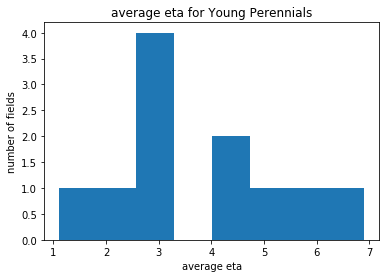

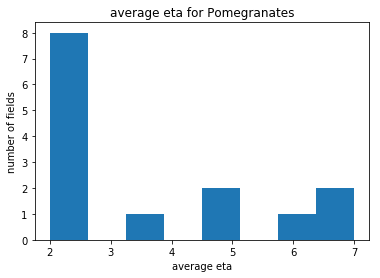

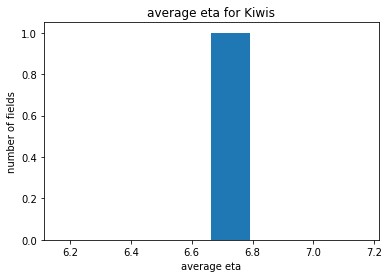

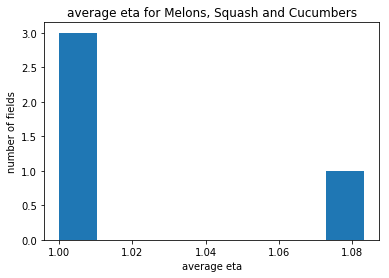

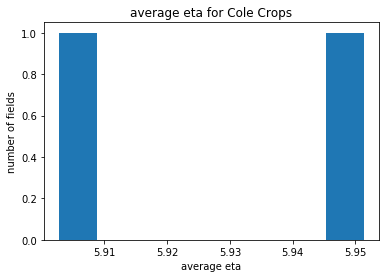

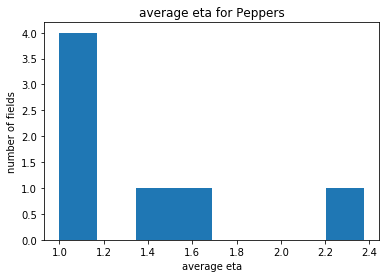

In [8]:
for key, value in crops_dict.items():
    draw_hist_by_crop(value, key, save_to_file = True)

In [10]:
# compute the standard deviation for mean eta of every crop
for key, value in crops_dict.items():
    print(key)
    print(np.std(np.array(value, dtype=np.float64)))

Grapes
1.674823738125353
Idle
2.330655409355303
Tomatoes
1.9653933491231512
Pistachios
1.89895587768188
Almonds
1.57386634512122
Wheat
2.2002190225226257
Citrus
1.972311473642506
Cherries
1.6472015860951557
Cotton
2.4286339397596266
Flowers, Nursery and Christmas Tree Farms
1.6649035144363424
Miscellaneous Deciduous
0.9741574578320708
Alfalfa and Alfalfa Mixtures
2.0967100339084688
Onions and Garlic
1.6182825190664791
Miscellaneous Grain and Hay
3.006403789638245
Bush Berries
1.7568668734274904
Miscellaneous Truck Crops
1.8398893816856197
Walnuts
2.1487236908679974
Carrots
1.8754839935591456
Corn, Sorghum and Sudan
2.4516438365413395
Urban
0.47629774572525424
Young Perennials
1.684924811261852
Pomegranates
1.9008949807597493
Kiwis
0.0
Melons, Squash and Cucumbers
0.03608439182435014
Cole Crops
0.024227549701484996
Peppers
0.46276034784666004


In [23]:
def fit_norm_by_crop(eta_arr, crop, save_to_file = False):
    mean, std=norm.fit(np.array(eta_arr, dtype=np.float64))
    plt.hist(np.array(eta_arr, dtype=np.float64), bins=8, density=True)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    y = norm.pdf(x, mean, std)
    plt.plot(x, y)
    if save_to_file:
        plt.savefig('../plots/' + crop + '_eta_normFit.png')
    plt.show()

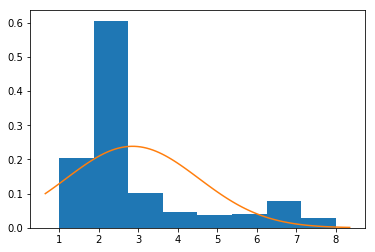

In [24]:
fit_norm_by_crop(crops_dict["Grapes"], "Grapes")

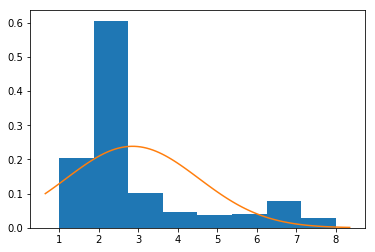

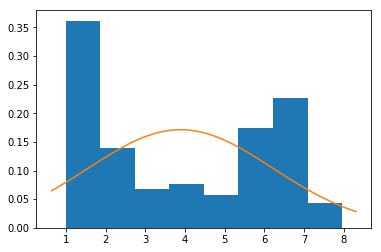

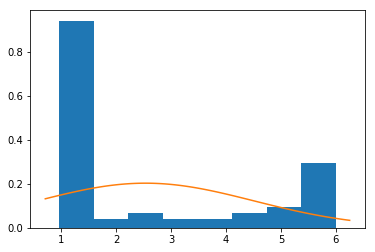

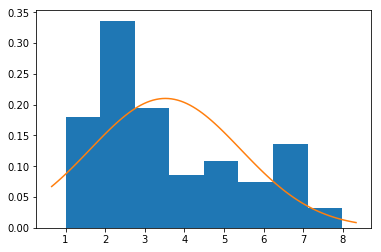

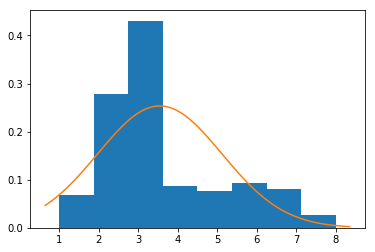

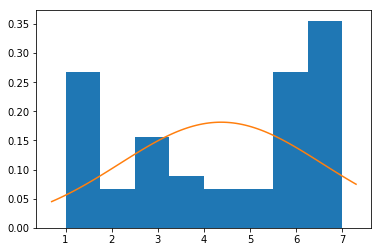

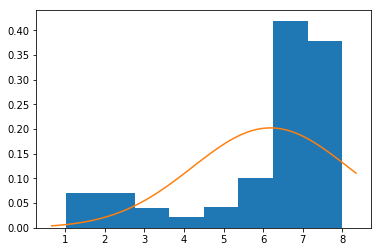

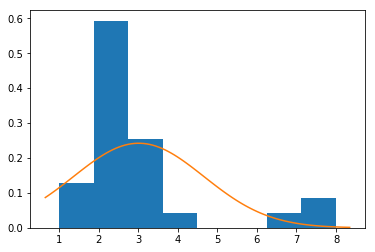

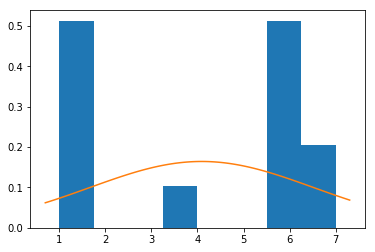

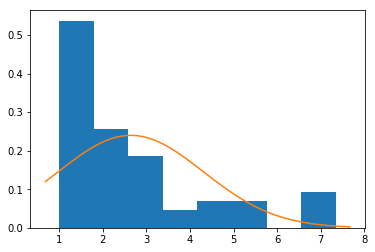

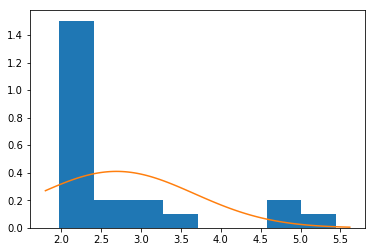

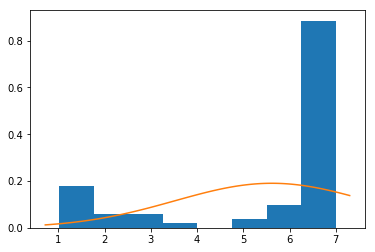

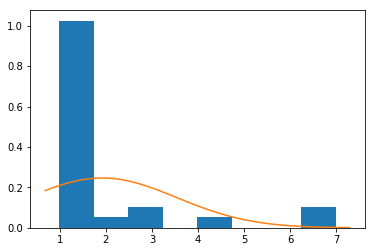

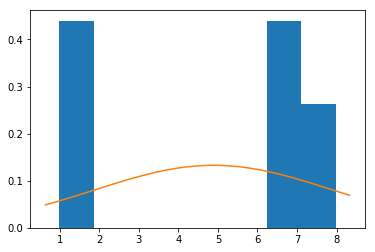

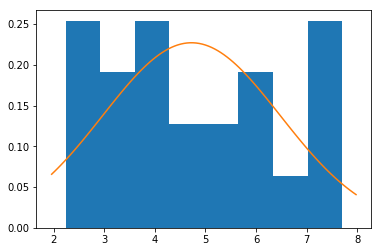

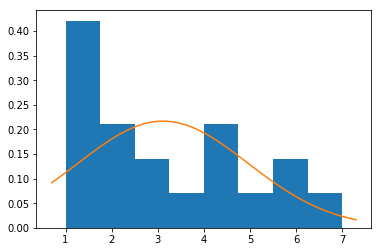

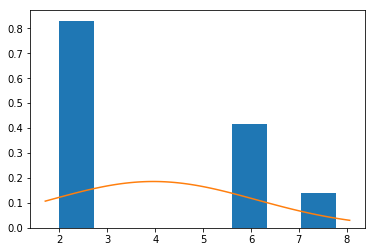

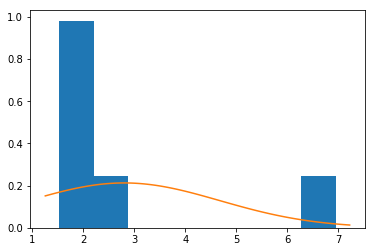

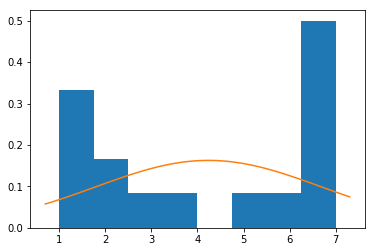

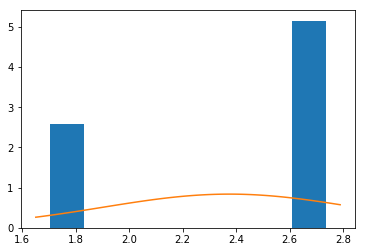

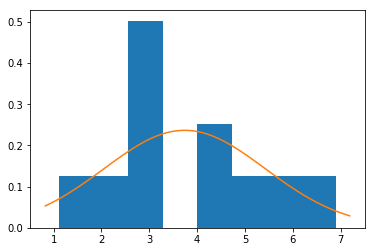

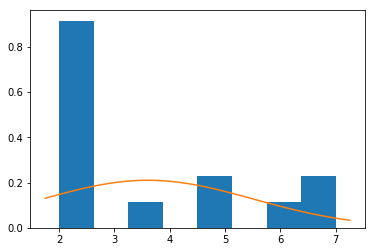

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1662: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


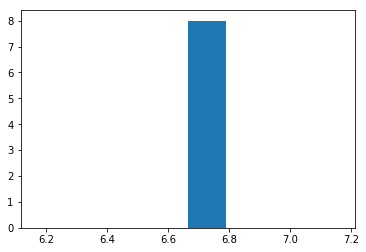

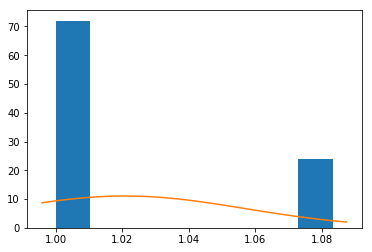

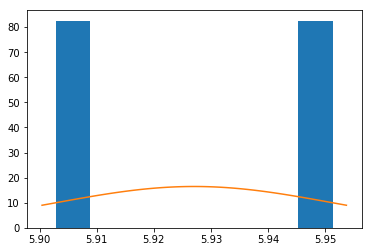

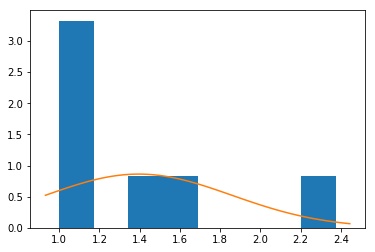

In [25]:
for key, value in crops_dict.items():
    fit_norm_by_crop(value, key, save_to_file = True)